In [1]:
# E-Commerce Customer Behavior Analysis
# Exploratory Data Analysis (EDA)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,5)
sns.set(style="whitegrid")


In [7]:
import pandas as pd
df = pd.read_csv("flipkart_com-ecommerce_sample.csv")
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
df.shape

(20002, 15)

In [8]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [19]:
df.info()   # Dataset Information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [10]:
df.isnull().sum()   #Check Missing Values


uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

In [11]:
df.duplicated().sum()  #Check duplicates


np.int64(1)

In [12]:
df.drop_duplicates(inplace=True)  #Remove duplicates


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
# Basic Statistics (Numerical Columns)
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


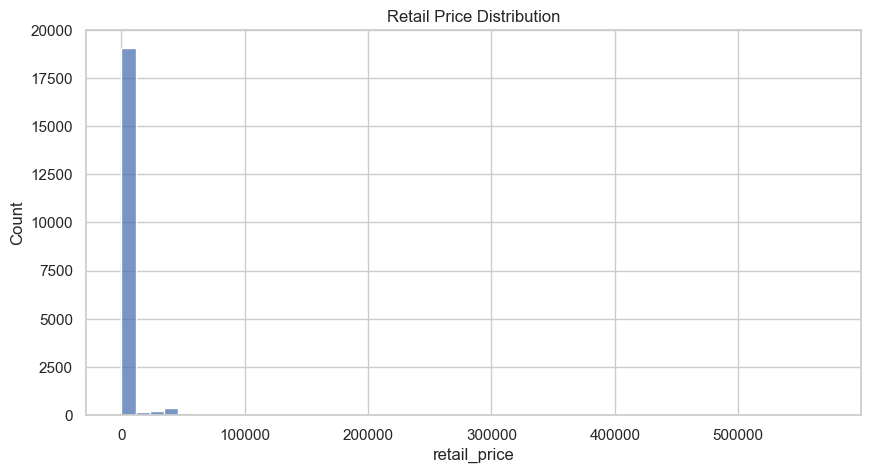

In [18]:
# Analyze Price Distribution

sns.histplot(df['retail_price'], bins=50)
plt.title("Retail Price Distribution")
plt.show()

In [20]:
# Discount Analysis
df['discount'] = df['retail_price'] - df['discounted_price']
df[['retail_price','discounted_price','discount']].head()


,retail_price,discounted_price,discount
0,999.0,379.0,620.0
1,32157.0,22646.0,9511.0
2,999.0,499.0,500.0
3,699.0,267.0,432.0
4,220.0,210.0,10.0


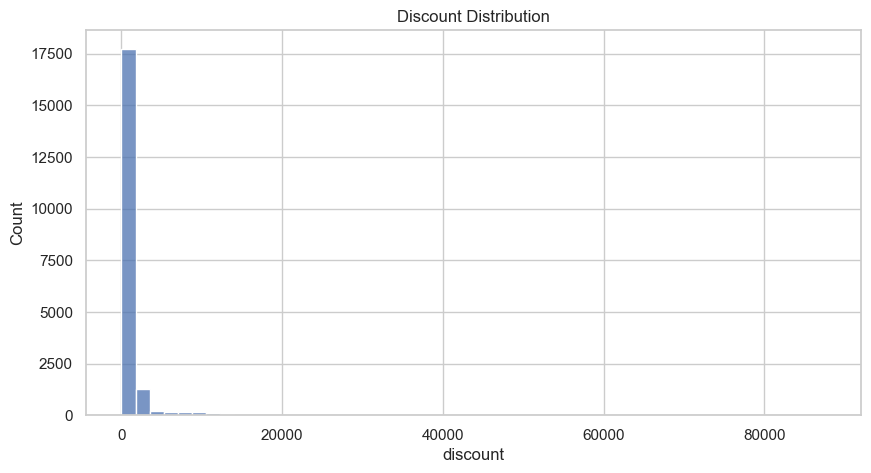

In [16]:
sns.histplot(df['discount'], bins=50)
plt.title("Discount Distribution")
plt.show()

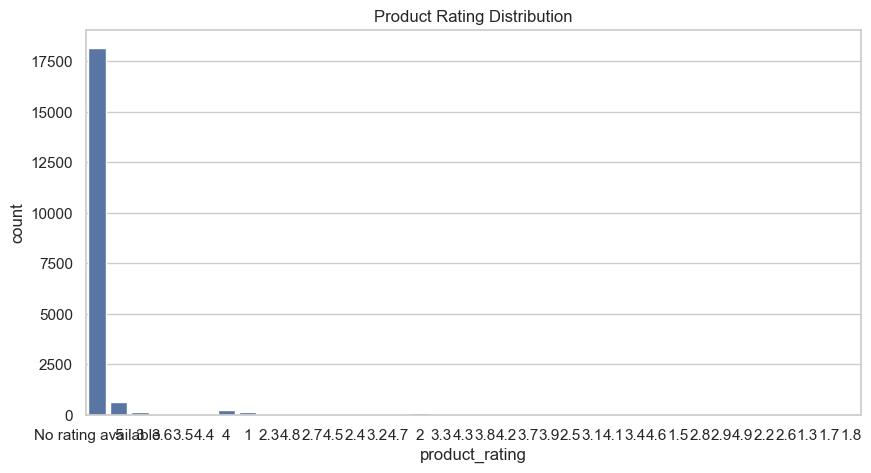

In [25]:
# Product Rating Analysis
sns.countplot(x='product_rating', data=df)
plt.title("Product Rating Distribution")
plt.show()


In [26]:
""" 
GRAPH IS NOT PROPER Problems:
Ratings are strings, not numbers
No rating available" dominates the data
Too many unique rating values
X-axis labels overlap
"""


' \nGRAPH IS NOT PROPER Problems:\nRatings are strings, not numbers\nNo rating available" dominates the data\nToo many unique rating values\nX-axis labels overlap\n'

In [13]:
df['brand'].value_counts().head(10)

brand
Allure Auto     469
Regular         313
Voylla          299
Slim            288
TheLostPuppy    229
Karatcraft      211
Black           167
White           155
DailyObjects    144
Speedwav        141
Name: count, dtype: int64

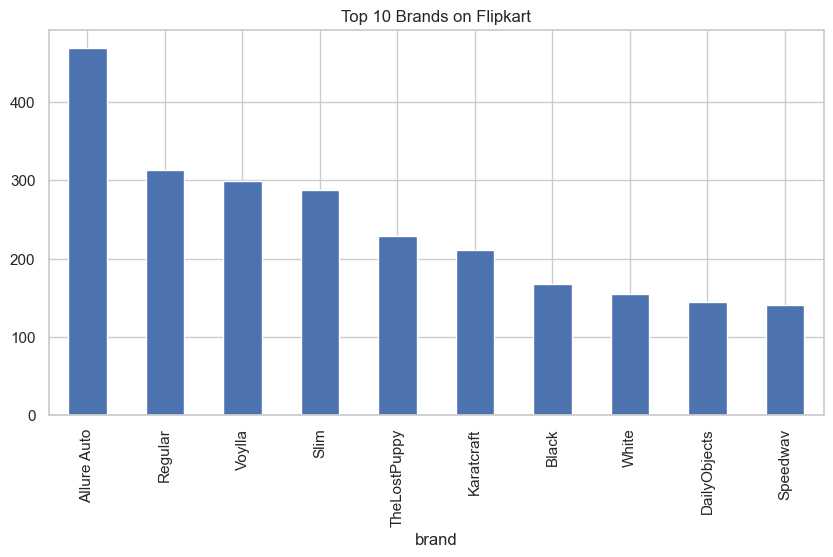

In [11]:
df['brand'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Brands on Flipkart")
plt.show()

In [12]:
df['product_category_tree'].value_counts().head(10)


product_category_tree
["Jewellery >> Necklaces & Chains >> Necklaces"]                                                       1567
["Jewellery >> Rings"]                                                                                  710
["Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Interior >> Car Mats"]      522
["Jewellery >> Bangles, Bracelets & Armlets >> Bangles"]                                                430
["Tools & Hardware >> Tools >> Gardening Tools >> Plant Containers & Sets >> Plant Container Sets"]     332
["Jewellery >> Bangles, Bracelets & Armlets >> Bracelets"]                                              251
["Mobiles & Accessories >> Tablet Accessories >> Cases & Covers >> TheLostPuppy Cases & Covers"]        229
["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Bras >> S4S Bras"]                      197
["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                                           190
["Foot

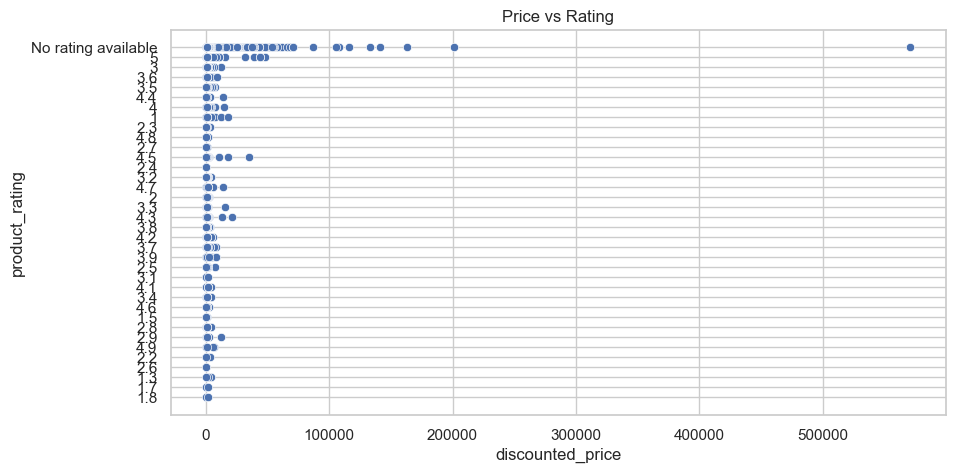

In [16]:
sns.scatterplot(x='discounted_price', y='product_rating', data=df)
plt.title("Price vs Rating")
plt.show()


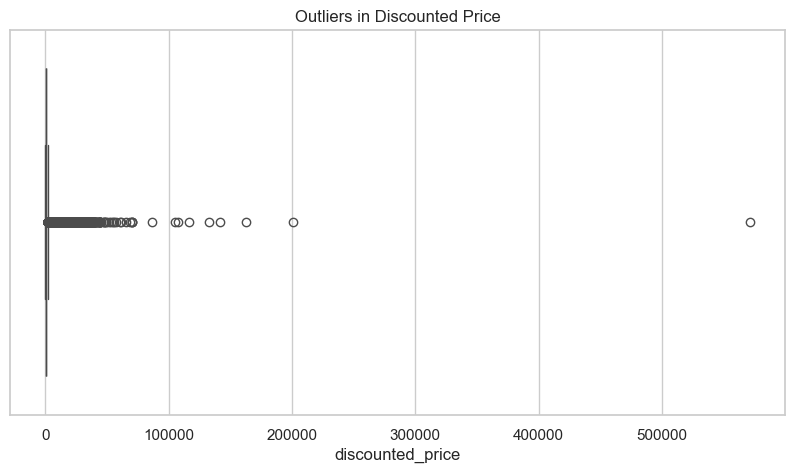

In [17]:
sns.boxplot(x=df['discounted_price'])
plt.title("Outliers in Discounted Price")
plt.show()


In [18]:
# ADVANCED EDA

In [9]:
df['discount'] = df['retail_price'] - df['discounted_price']


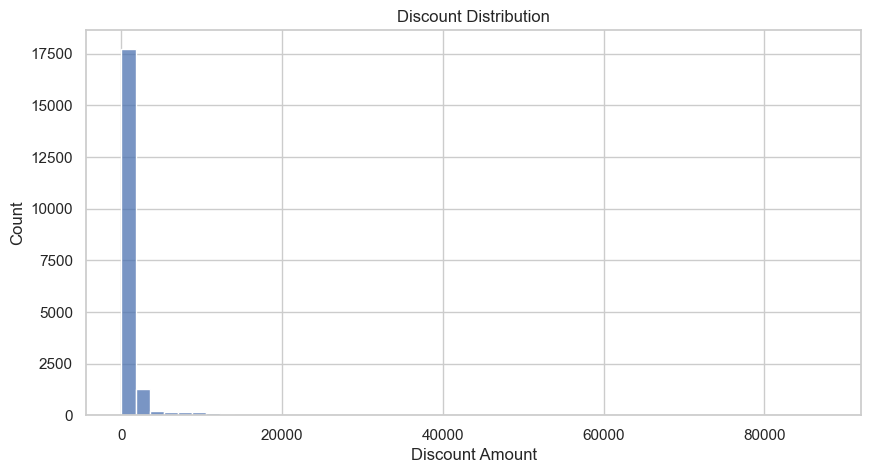

In [10]:
sns.histplot(df['discount'], bins=50)
plt.title("Discount Distribution")
plt.xlabel("Discount Amount")
plt.show()


In [11]:
df['discount_percent'] = (df['discount'] / df['retail_price']) * 100

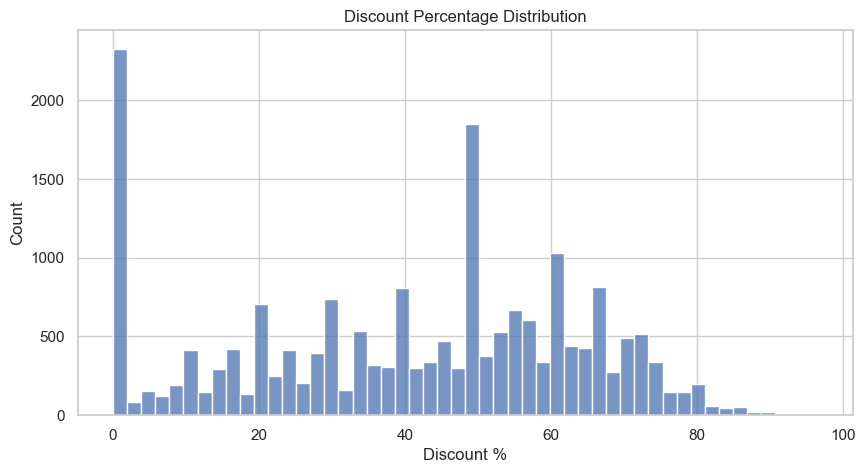

In [12]:
sns.histplot(df['discount_percent'], bins=50)
plt.title("Discount Percentage Distribution")
plt.xlabel("Discount %")
plt.show()

In [8]:
rating_df = df[df['product_rating'] != 'No Rating available']
rating_df['product_rating'] = pd.to_numeric(rating_df['product_rating'], errors='coerce')
rating_df = rating_df.dropna(subset=['product_rating'])

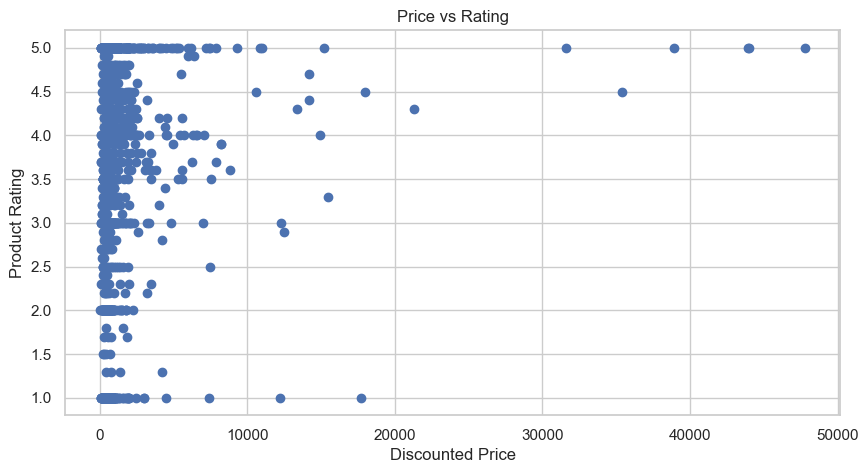

In [9]:
plt.scatter(rating_df['discounted_price'], rating_df['product_rating'])
plt.xlabel("Discounted Price")
plt.ylabel("Product Rating")
plt.title("Price vs Rating")
plt.show()


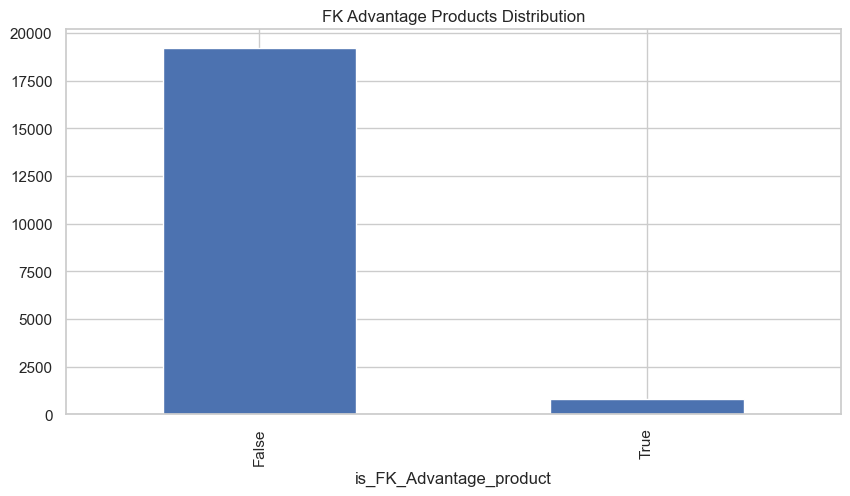

In [10]:
df['is_FK_Advantage_product'].value_counts().plot(kind='bar')
plt.title("FK Advantage Products Distribution")
plt.show()


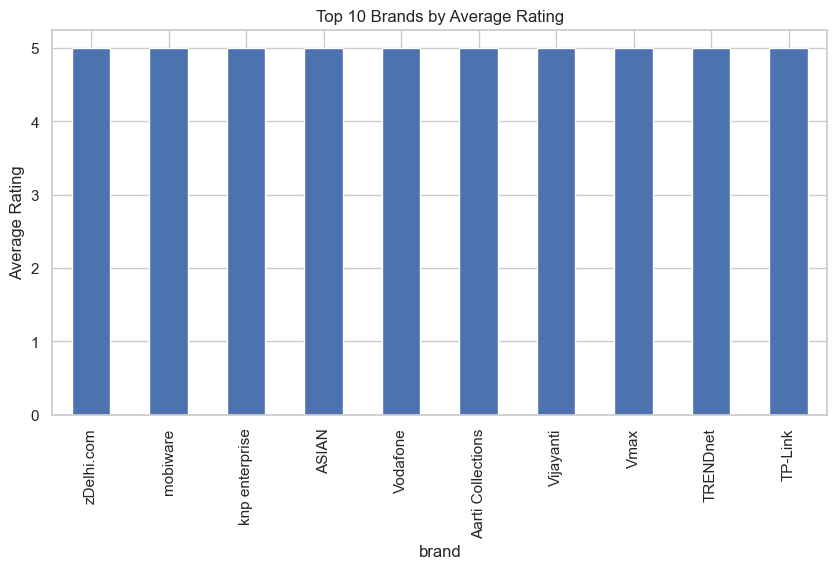

In [11]:
brand_rating = rating_df.groupby('brand')['product_rating'].mean()
brand_rating.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Brands by Average Rating")
plt.ylabel("Average Rating")
plt.show()


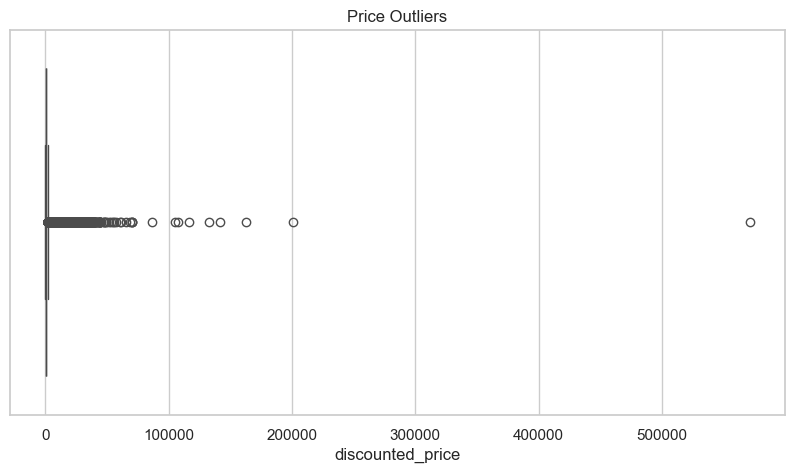

In [12]:
sns.boxplot(x=df['discounted_price'])
plt.title("Price Outliers")
plt.show()
